# Time-Series Data Project

## Objectives
 
1. Import the 3 attached .csv files
2. Process the CSVs 
    - NOP_FORECAST_213.csv
        - Create two new columns: 'TODAY_ZONE_LOAD' and 'TODAY_LOAD'. These columns shoulds hold the totals for all zones by hour day, and totals for hours by day, respectively
    - NOP_FORECAST_214.csv
        -  Create two new columns: 'PREVIOUS_DAY_ZONE_LOAD' and 'PREVIOUS_DAY_LOAD'. These columns shoulds hold the totals for all zones by hour by day and totals for hours by day FOR THE PREVIOUS DAY respectively
    - LFG_ST.csv
        - Create two new columns: 'ADJ_ZONE_LOAD' and 'ADJ_TODAY_LOAD'. They should both be constructed by summming together 'UNADJ_LOAD', 'DISTRIB_LOSS_LOAD' and 'TRANSMISSION_LOSS_LOAD', and should contain totals for all zones by hour by day, and totals for hours by day.
    
    
3. Create an output file (output.csv) from with data from the six columns created above, along with 'FORECAST_DT','CONGESTION_ZONE' and 'HOUR_NUM'. (Final table should have 9 columns, assuming a default index.) (Example table head displayed below)


4. Plot data (TODAY_LOAD, PREV_DAY_LOAD, ADJ_LOAD), by the hour, from 2/14 - 2/24 using a library of your choice. (Example plot in plotly attached in folder)


In [1]:
#Import dependencies


#Standard data manipulation dependencies
import pandas as pd
import numpy as np

#Visualize data (You can also import another visualization library)
import matplotlib.pyplot as plt

#Critical for plotting TimeSeries
import datetime

#PLotly makes plotting time series a bit easier.
import plotly
import plotly.graph_objs as go
from plotly.offline import *

#Ignore 'SettingWithCopyError'
import warnings
warnings.simplefilter('ignore')

#Track runtime 
from timeit import default_timer as timer



### How data should look on import

In [4]:
lfg_st.head()

,CONGESTION_ZONE_CD,Forecast_Dt,Hour_num,UNADJ_LOAD,DISTRIB_LOSS_LOAD,TRANSMISSION_LOSS_LOAD
0,H,2/13/2018,1,0.006320,0.000386,0.000159
1,H,2/13/2018,1,0.001185,0.000139,0.000030
2,H,2/13/2018,1,0.000479,0.000056,0.000012
3,H,2/13/2018,1,0.006798,0.000416,0.000171
4,H,2/13/2018,1,0.016094,0.000984,0.000404


In [5]:
nop_213.head()

,MARKET_CD,FORECAST_DT,HOUR_NUM,CONGESTION_ZONE,SOURCE_CD,TEMP_BAND_CD,UTILITY_CD,LSE_CD,VOLUME,LOSS,DERATION_LOSS_LOAD,CAP_OB,TRAN_OB,Sch_VOLUME,Sch_LOSS,Sch_DERATION_LOSS_LOAD
0,ERCOT,2/13/2018,1,Houston zone,CUST,A,TNMP,375,2.758249,0.242251,0,0,0,2.758249,0.242251,0
1,ERCOT,2/13/2018,1,Houston zone,CUST,A,TXRL,375,40.545011,2.436925,0,0,0,40.545011,2.436925,0
2,ERCOT,2/13/2018,1,North zone,CUST,A,TNMP,375,2.067527,0.213708,0,0,0,2.067527,0.213708,0
3,ERCOT,2/13/2018,1,North zone,CUST,A,TXRL,375,0.004869,0.000293,0,0,0,0.004869,0.000293,0
4,ERCOT,2/13/2018,1,North zone,CUST,A,TXTU,375,73.154196,4.346080,0,0,0,73.154196,4.346080,0


In [6]:
nop_214.head()

,MARKET_CD,FORECAST_DT,HOUR_NUM,CONGESTION_ZONE,SOURCE_CD,TEMP_BAND_CD,UTILITY_CD,LSE_CD,VOLUME,LOSS,DERATION_LOSS_LOAD,CAP_OB,TRAN_OB,Sch_VOLUME,Sch_LOSS,Sch_DERATION_LOSS_LOAD
0,ERCOT,2/14/2018,1,Houston zone,CUST,A,TNMP,375,1.791993,0.200250,0,0,0,1.791993,0.200250,0
1,ERCOT,2/14/2018,1,Houston zone,CUST,A,TXRL,375,26.289101,1.705854,0,0,0,26.289101,1.705854,0
2,ERCOT,2/14/2018,1,North zone,CUST,A,TNMP,375,1.638522,0.216521,0,0,0,1.638522,0.216521,0
3,ERCOT,2/14/2018,1,North zone,CUST,A,TXRL,375,0.003867,0.000251,0,0,0,0.003867,0.000251,0
4,ERCOT,2/14/2018,1,North zone,CUST,A,TXTU,375,56.063652,3.555944,0,0,0,56.063652,3.555944,0


#### nop_214 dataframe

In [20]:
#How sums should look
nop_214_fhz.head(10)

,FORECAST_DT,HOUR_NUM,CONGESTION_ZONE,ZONE_TODAY_LOAD,TODAY_LOAD
0,2018-02-14,1,Houston zone,98.940027,621.433774
1,2018-02-14,1,North zone,195.398215,621.433774
2,2018-02-14,1,South zone,301.773454,621.433774
3,2018-02-14,1,West zone,25.322078,621.433774
4,2018-02-14,2,Houston zone,89.413113,579.538045
5,2018-02-14,2,North zone,183.664794,579.538045
6,2018-02-14,2,South zone,281.022096,579.538045
7,2018-02-14,2,West zone,25.438042,579.538045
8,2018-02-14,3,Houston zone,85.222173,557.436495
9,2018-02-14,3,North zone,176.395692,557.436495


#### nop_213 dataframe

In [26]:
#How sums should look
nop_213_fhz.head()

,FORECAST_DT,HOUR_NUM,CONGESTION_ZONE,ZONE_PREV_DAY_LOAD,PREV_DAY_LOAD
0,2018-02-14,1,Houston zone,157.076491,834.227154
1,2018-02-14,1,North zone,254.090751,834.227154
2,2018-02-14,1,South zone,386.064643,834.227154
3,2018-02-14,1,West zone,36.995269,834.227154
4,2018-02-14,2,Houston zone,148.039450,794.797326





#### lfg_st dataframe

In [32]:
#How sums should look
lfg_st_fhz.head()

,FORECAST_DT,HOUR_NUM,CONGESTION_ZONE,ZONE_ADJ_LOAD,ADJ_LOAD
0,2018-02-14,1,Houston zone,99.500612,523.878209
1,2018-02-14,1,North zone,176.613699,523.878209
2,2018-02-14,1,South zone,218.081467,523.878209
3,2018-02-14,1,West zone,29.682430,523.878209
4,2018-02-14,2,Houston zone,94.040979,497.385234


#### Constructing output file

In [33]:
#How output file should look

,FORECAST_DT,HOUR_NUM,CONGESTION_ZONE,ZONE_TODAY_LOAD,TODAY_LOAD,ZONE_PREV_DAY_LOAD,PREV_DAY_LOAD,ZONE_ADJ_LOAD,ADJ_LOAD
0,2018-02-14,1,Houston zone,98.940027,621.433774,157.076491,834.227154,99.500612,523.878209
1,2018-02-14,1,North zone,195.398215,621.433774,254.090751,834.227154,176.613699,523.878209
2,2018-02-14,1,South zone,301.773454,621.433774,386.064643,834.227154,218.081467,523.878209
3,2018-02-14,1,West zone,25.322078,621.433774,36.995269,834.227154,29.682430,523.878209
4,2018-02-14,2,Houston zone,89.413113,579.538045,148.039450,794.797326,94.040979,497.385234


In [34]:
output.shape

(4416, 9)

#### Visualize 'TODAY_LOAD', 'PREV_DAY_LOAD', and 'ADJ_LOAD', by the hour, from 2/14 - 2/24

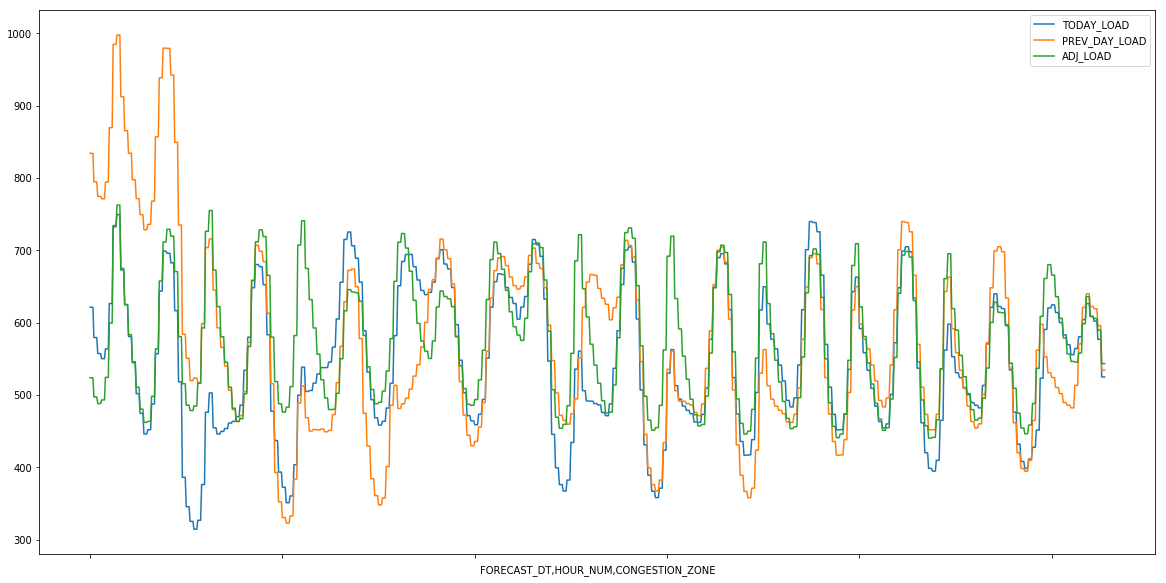

In [41]:
#Test plot to see how the final graph should approximately look like.

### Start Lab Here